# 다변량 분석 1차 과제

- 데이터 셋 : 집 가격 예측 데이터
https://www.kaggle.com/datasets/shree1992/housedata?select=data.csv



The real estate markets, like those in Sydney and Melbourne, present an interesting opportunity for data analysts to analyze and predict where property prices are moving towards. Prediction of property prices is becoming increasingly important and beneficial. Property prices are a good indicator of both the overall market condition and the economic health of a country. Considering the data provided, we are wrangling a large set of property sales records stored in an unknown format and with unknown data quality issues

필요한 모듈 준비

In [64]:
%pip install -r requirements.txt

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import skewtest as skew
from scipy.stats import kurtosistest as kurtosis
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import pylab

from typing import Union


- date: Date of the house sale
- price: Price of each house sold
- bedrooms: Number of bedrooms in each house
- bathrooms: Number of bathrooms in each house (0.5 indicates a room with a toilet but no shower)
- sqft_living: Square footage of the interior living space of each house
- sqft_lot: Square footage of the land space of each house
- floors: Number of floors in each house
- waterfront: Whether or not the house is located on a waterfront (1 = yes, 0 = no)
- view: An index from 0 to 4 of how good the view of the property was
- condition: An index from 1 to 5 on the condition of the house,
- sqft_above: The square footage of the interior housing space that is above ground level
- sqft_basement: The square footage of the interior housing space that is below ground level
- yr_built: The year that each house was built
- yr_renovated: The year that each house was renovated (if applicable)
- street: The street name where the house located
- city: The city name where the house located
- country: The country name where the house located

In [66]:
#데이터 불러오기
data = pd.read_csv("data.csv")
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [67]:
data = data[['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'waterfront', 'view', 'condition','city',
       'statezip', 'country']]
print(data.columns)
data.info()

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'street', 'waterfront', 'view', 'condition', 'city', 'statezip',
       'country'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   sqft_above     4600 non-null   int64  
 8   sqft_basement  4600 non-null   int64  
 9   yr_built       4600 non-null   int64  
 10  yr_renovated   4600 non-null   int64  
 11  street         4600 non-null   object 
 12  waterfr

In [68]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,street,waterfront,view,condition,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,1340,0,1955,2005,18810 Densmore Ave N,0,0,3,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,3370,280,1921,0,709 W Blaine St,0,4,5,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,1930,0,1966,0,26206-26214 143rd Ave SE,0,0,4,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,1000,1000,1963,0,857 170th Pl NE,0,0,4,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,1140,800,1976,1992,9105 170th Ave NE,0,0,4,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,1510,0,1954,1979,501 N 143rd St,0,0,4,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,1460,0,1983,2009,14855 SE 10th Pl,0,0,3,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,3010,0,2009,0,759 Ilwaco Pl NE,0,0,3,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,1070,1020,1974,0,5148 S Creston St,0,0,3,Seattle,WA 98178,USA


In [69]:
def data_explanation(data):
    with open('./data_description.txt','w') as f:
        for i in data.columns:
            f.write(f'Feature Name: {i} \n')
            f.write(f'# of data: {len(data[i])} \n')
            f.write(f'# of unique data: {len(data[i].unique())} \n')
            f.write(f'unique datas: {data[i].unique()} \n\n')
    f.close()
data_explanation(data)

- date: 매매시간이 2014년 4,5,6월에 대해 존재하는데, 큰 날짜 차이가 나지 않는 만큼 가격에는 큰 영향이 없을 것으로 보여진다.
- statezip: 미국 주택 고유번호, 우리나라의 우편번호와 비슷한 것으로 보여진다. City category에 어느정도 포함된 내용일 것으로 보이며, 총 데이터 양 77개로 one-hot-encoding 시 너무 Sparce한 matrix가 형성될 것으로 보임.
- country: USA 하나의 고유데이터밖에 존재하지 않음
- street: 실제로는 '테헤란로'처럼 중요한 지표이나, 총 4600여개의 데이터 중 unique 데이터가 4500, 범주형 변수기 때문에 MLR 에서는 분별능력이 없을 것으로 보인다.

In [70]:
data = data.drop(columns = ['date','statezip','country','street'], axis= 1)

price 데이터에 0원으로 책정된 집들이 포착됨, 이는 굉장히 unusual 하며, 파산으로인한 몰수이거나 특별한 사정이 있어 거래된 것으로 보이므로 0인데이터의 경우 drop했다.

In [71]:
index = []
for idx, price in enumerate(data['price']):
    if price == 0:
        index.append(idx)
        
        
data.drop(index=index, inplace = True)
data.index = list(range(len(data)))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4551 entries, 0 to 4550
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4551 non-null   float64
 1   bedrooms       4551 non-null   float64
 2   bathrooms      4551 non-null   float64
 3   sqft_living    4551 non-null   int64  
 4   sqft_lot       4551 non-null   int64  
 5   floors         4551 non-null   float64
 6   sqft_above     4551 non-null   int64  
 7   sqft_basement  4551 non-null   int64  
 8   yr_built       4551 non-null   int64  
 9   yr_renovated   4551 non-null   int64  
 10  waterfront     4551 non-null   int64  
 11  view           4551 non-null   int64  
 12  condition      4551 non-null   int64  
 13  city           4551 non-null   object 
dtypes: float64(4), int64(9), object(1)
memory usage: 533.3+ KB


## 선형성 확인

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_30248/1394726839.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<AxesSubplot:>

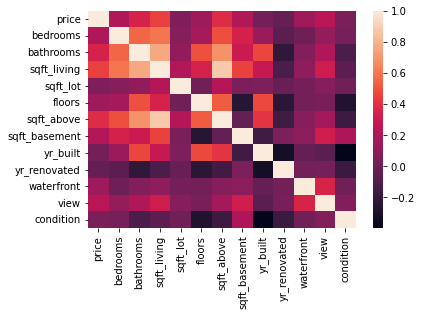

In [72]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

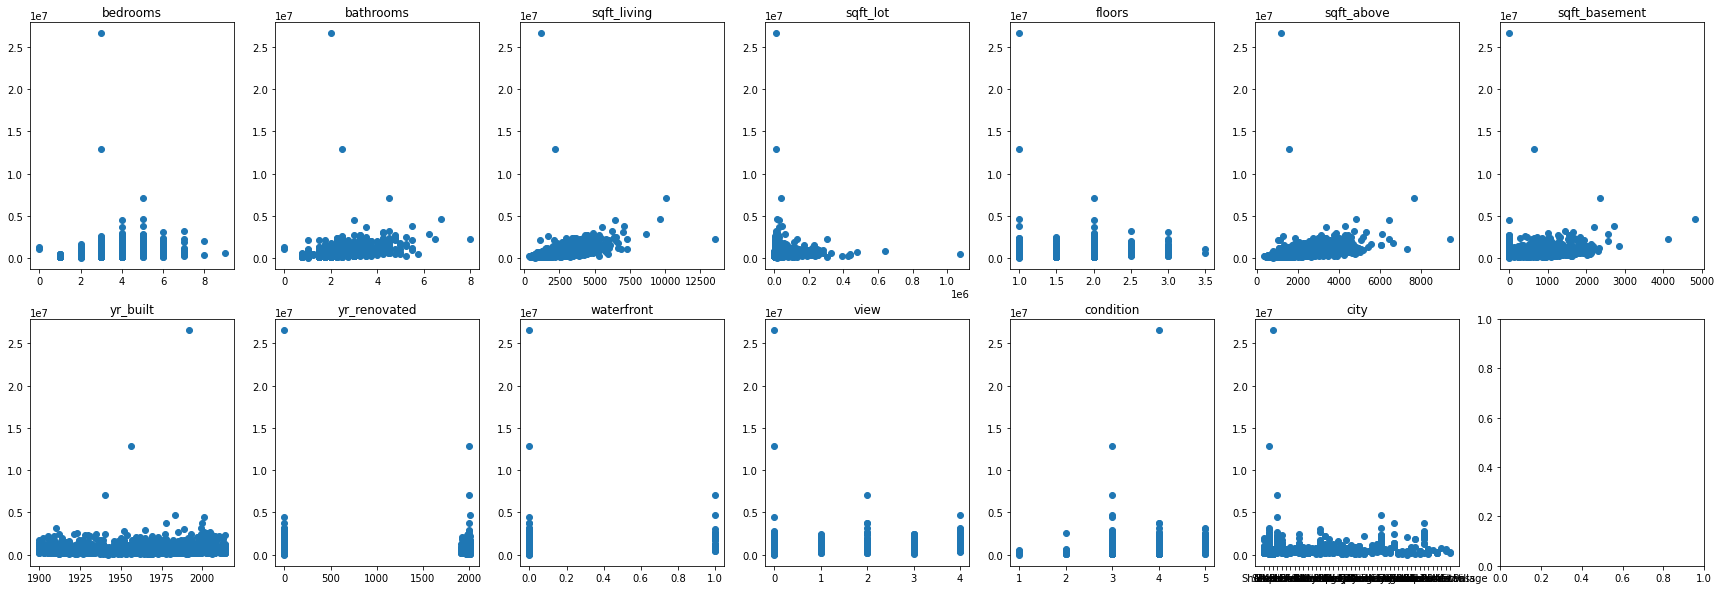

In [73]:
def scatter_plot_desplay(data,):
    X = data.iloc[:,1:]
    y = data.iloc[:,0]
    fig, axs = plt.subplots(2,len(X.columns)//2+1,figsize=(30,10))

    k , j = 0, 0
    for i in range(len(X.columns)):
        if i == len(X.columns)//2+1:
            k +=1
            j = 0
        axs[k,j].scatter(X.iloc[:,i], y)
        axs[k,j].set_title(X.columns[i])
        j +=1

    plt.show()
    
scatter_plot_desplay(data)

이상치 때문에 잘 보이지 않아 가장 큰 price 5개만 drop한뒤 다시 진행

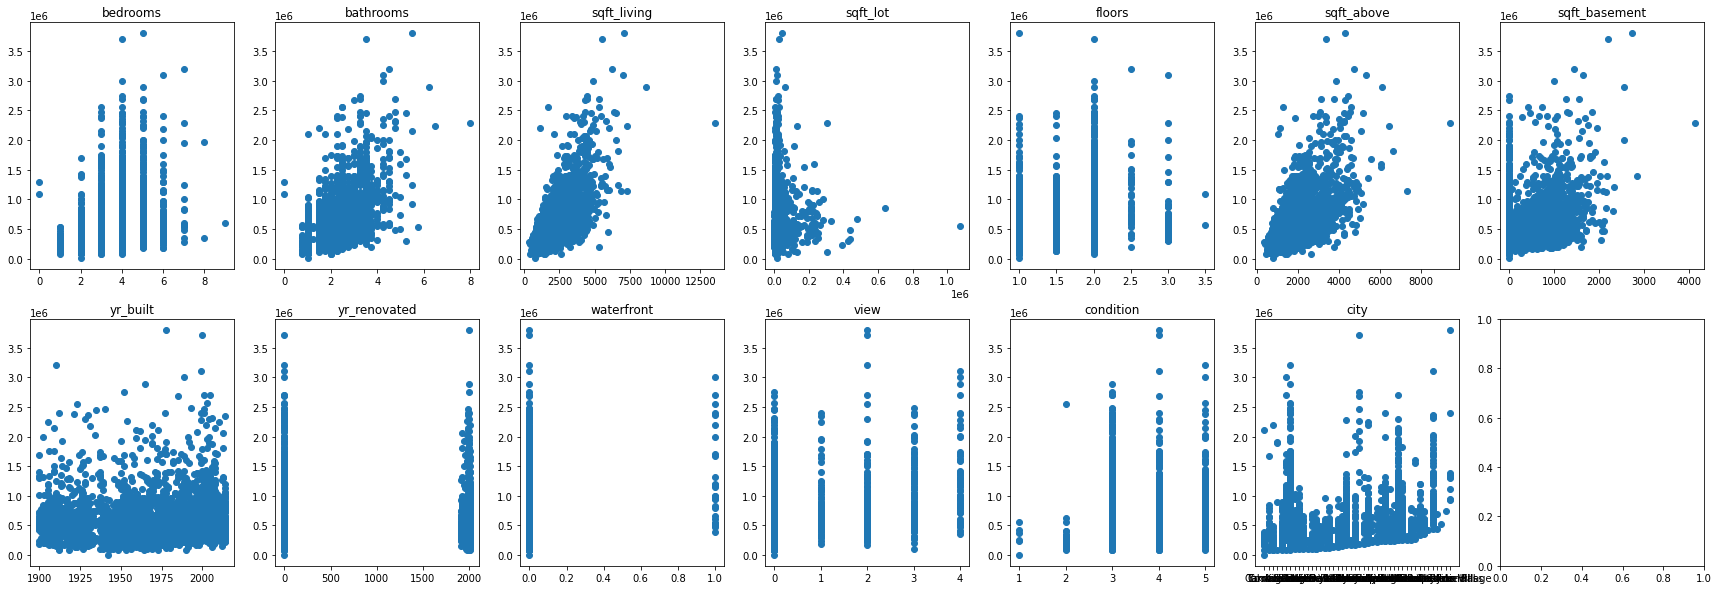

In [74]:
data_2 = data.copy()
df = data_2.sort_values(by='price').iloc[:-5]
scatter_plot_desplay(df)

In [75]:
data[data.isna()].count().sum() #결측치 확인

0

City column의 경우 1-to-C coding이 필요

In [76]:
def one_hot_changer(data, column_name):
    """
    one_hot_encoding된 데이터 프레임을 반환합니다.
    """
    oh = OneHotEncoder()
    encoder = oh.fit_transform(data[column_name].values.reshape(-1,1)).toarray()
    df_OH = pd.DataFrame(encoder, columns = [column_name+'_' + str(oh.categories_[0][i]) for i in range (len(oh.categories_[0]))])
    print(df_OH.columns)
    return df_OH

df_OH = one_hot_changer(data, 'city')

Index(['city_Algona', 'city_Auburn', 'city_Beaux Arts Village',
       'city_Bellevue', 'city_Black Diamond', 'city_Bothell', 'city_Burien',
       'city_Carnation', 'city_Clyde Hill', 'city_Covington',
       'city_Des Moines', 'city_Duvall', 'city_Enumclaw', 'city_Fall City',
       'city_Federal Way', 'city_Inglewood-Finn Hill', 'city_Issaquah',
       'city_Kenmore', 'city_Kent', 'city_Kirkland', 'city_Lake Forest Park',
       'city_Maple Valley', 'city_Medina', 'city_Mercer Island', 'city_Milton',
       'city_Newcastle', 'city_Normandy Park', 'city_North Bend',
       'city_Pacific', 'city_Preston', 'city_Ravensdale', 'city_Redmond',
       'city_Renton', 'city_Sammamish', 'city_SeaTac', 'city_Seattle',
       'city_Shoreline', 'city_Skykomish', 'city_Snoqualmie',
       'city_Snoqualmie Pass', 'city_Tukwila', 'city_Vashon',
       'city_Woodinville', 'city_Yarrow Point'],
      dtype='object')


In [77]:
len(df_OH.columns)

44

In [78]:
data = data.iloc[:,:-1]
data = pd.concat([data, df_OH.iloc[:,:-1]], axis = 1) #다중공선성 제어를 위해 column 하나 Drop

In [79]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,...,city_Sammamish,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville
0,3.130000e+05,3.0,1.50,1340,7912,1.5,1340,0,1955,2005,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.384000e+06,5.0,2.50,3650,9050,2.0,3370,280,1921,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,1930,0,1966,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,1000,1000,1963,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,1140,800,1976,1992,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4546,3.081667e+05,3.0,1.75,1510,6360,1.0,1510,0,1954,1979,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4547,5.343333e+05,3.0,2.50,1460,7573,2.0,1460,0,1983,2009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4548,4.169042e+05,3.0,2.50,3010,7014,2.0,3010,0,2009,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4549,2.034000e+05,4.0,2.00,2090,6630,1.0,1070,1020,1974,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
def statistics(data, except_columns_start:int):
    """
    input: Pandas DataFrame, 제외할 Column 시작 index number
    output: statistics DataFrame
    """
    df_stat = pd.DataFrame(columns = ['mean','std','skewness','skew_pvalue','kurtosis','kurtosis_pvalue'])
    data = data.iloc[:,:except_columns_start]
    for i in data.columns:
        feature = data[i]
        feature_name = i
        
        mean = np.mean(feature)
        std = np.std(feature)
        skewness = skew(feature)
        kurtosis_ = kurtosis(feature)
        
        stats = {'mean': round(mean,5),'std':round(std,5),'skewness':round(skewness[0],5),'skew_pvalue':round(skewness[1],5),'kurtosis':round(kurtosis_[0],5),'kurtosis_pvalue':round(kurtosis_[1],5)}
        con = pd.DataFrame(stats,index=[feature_name])
        df_stat = pd.concat([df_stat,con],axis=0)
    display(df_stat)
    return df_stat

In [81]:
df_stat = statistics(data, 10)

,mean,std,skewness,skew_pvalue,kurtosis,kurtosis_pvalue
price,557905.89914,563867.91118,92.87389,0.0,49.54967,0.0
bedrooms,3.39464,0.90450,12.26711,0.0,11.23444,0.0
bathrooms,2.15502,0.77627,15.04033,0.0,13.79880,0.0
sqft_living,2132.37223,955.84468,33.58014,0.0,26.90004,0.0
sqft_lot,14835.28060,35960.12638,75.00383,0.0,45.44460,0.0
floors,1.51220,0.53847,14.26409,0.0,-10.29772,0.0
sqft_above,1822.22171,854.35901,30.22481,0.0,19.96979,0.0
sqft_basement,310.15052,461.93687,32.81171,0.0,20.96807,0.0
yr_built,1970.79565,29.75680,-13.19082,0.0,-14.27247,0.0
yr_renovated,808.56405,979.31388,10.28638,0.0,132.18899,0.0


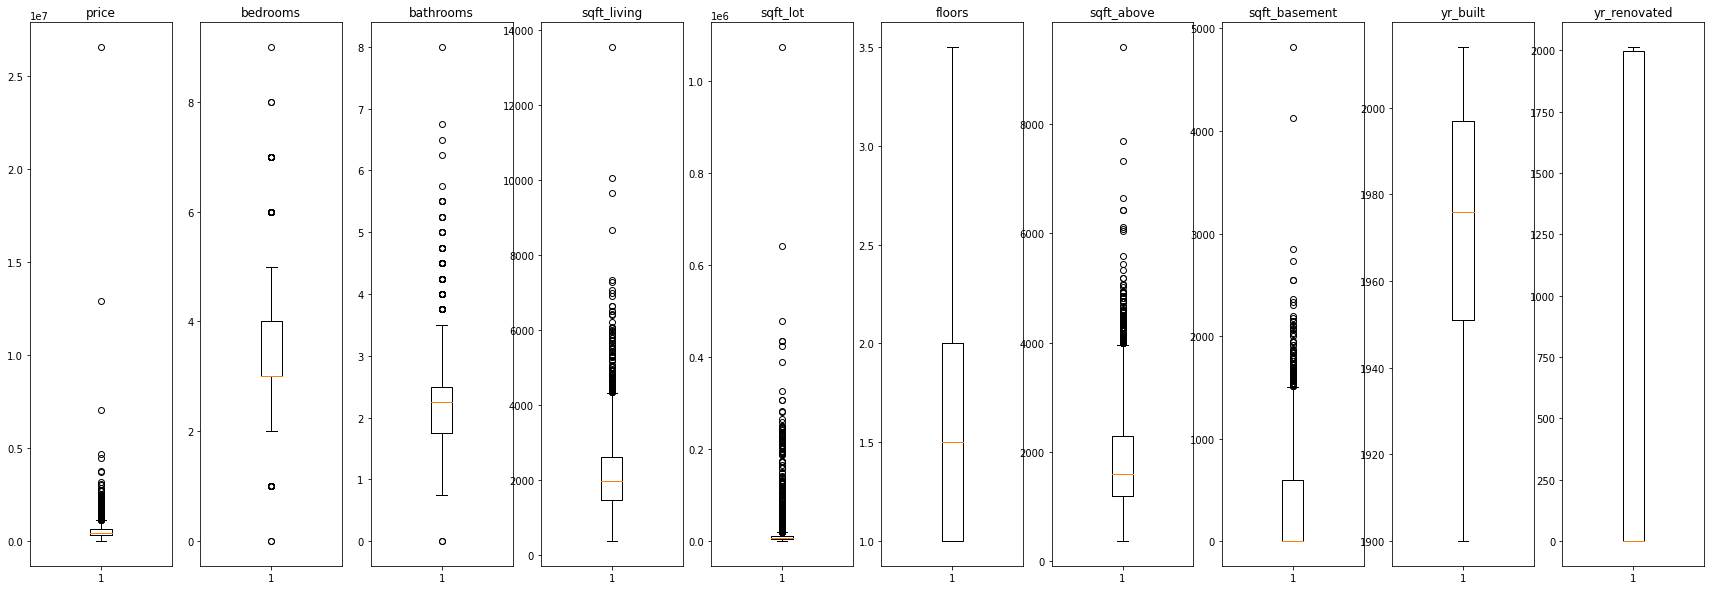

In [82]:
def box_plot_display(data, except_columns_start:int):
    data = data.iloc[:,:except_columns_start]
    fig, axs = plt.subplots(1,len(data.columns),figsize=(30,10))

    # Create a boxplot for each dataframe
    for i in range(len(data.columns)):
        axs[i].boxplot(data.iloc[:,i].to_numpy(),whis=1.5)
        axs[i].set_title(data.columns[i])

    plt.show()
    
box_plot_display(data,10)
    

year_renovated 부분을 보면 year built 가 minimum이 1900인데, renovated의 minimum이 0으로 되어있는 것을 확인.

실제로는 재건축을 하지 않은 것이나, 이를 그대로 쓰면 명목형데이터(재건축안함)을 수치형 데이터와 같이 쓰는 꼴이 되므로,

year_renovated에 0으로 되어있는 부분을 건축일로 변경하는 것이 옳을 듯 하다.

In [83]:
def reno_to_built(data):
    reno = data['yr_renovated']
    built = data['yr_built']
    
    for i in range(len(reno)):
        if reno[i] == 0:
            reno[i] = built[i]
    return reno

reno = reno_to_built(data)

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_30248/3555407416.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reno[i] = built[i]


In [84]:
reno.unique()

array([2005, 1921, 1966, 1963, 1992, 1994, 1976, 1989, 1985, 2010, 1988,
       1980, 2009, 1969, 1965, 1956, 1997, 2000, 1923, 1979, 1991, 1987,
       1948, 1920, 2014, 1999, 1967, 2003, 1995, 1944, 1957, 1974, 1983,
       1949, 1977, 1996, 2001, 1929, 2006, 2008, 1912, 2007, 1986, 1973,
       1954, 2011, 2013, 1942, 1908, 1972, 1990, 1998, 1971, 1975, 2004,
       1958, 1960, 1902, 1962, 1945, 1930, 1970, 1984, 1982, 1938, 1978,
       1928, 1950, 1964, 2002, 1903, 1959, 1993, 1910, 1904, 1947, 1917,
       1968, 1905, 2012, 1925, 1952, 1918, 1940, 1941, 1926, 1953, 1943,
       1936, 1981, 1927, 1931, 1951, 1937, 1946, 1932, 1901, 1906, 1907,
       1915, 1939, 1922, 1916, 1934, 1955, 1924, 1933, 1935, 1961, 1900,
       1913], dtype=int64)

In [85]:
data['yr_renovated'] = reno

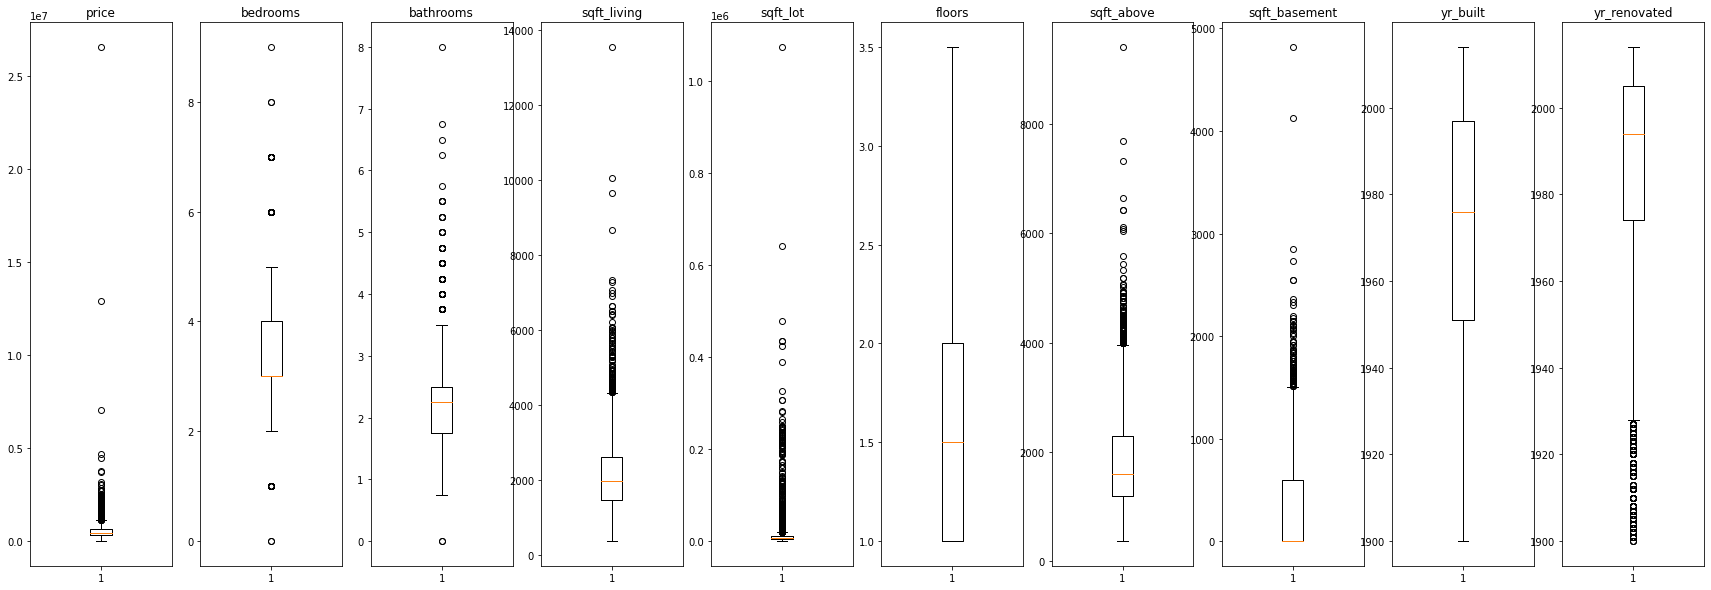

In [86]:
box_plot_display(data,10)

In [87]:
df_stat = statistics(data, 10)

,mean,std,skewness,skew_pvalue,kurtosis,kurtosis_pvalue
price,557905.89914,563867.91118,92.87389,0.0,49.54967,0.0
bedrooms,3.39464,0.90450,12.26711,0.0,11.23444,0.0
bathrooms,2.15502,0.77627,15.04033,0.0,13.79880,0.0
sqft_living,2132.37223,955.84468,33.58014,0.0,26.90004,0.0
sqft_lot,14835.28060,35960.12638,75.00383,0.0,45.44460,0.0
floors,1.51220,0.53847,14.26409,0.0,-10.29772,0.0
sqft_above,1822.22171,854.35901,30.22481,0.0,19.96979,0.0
sqft_basement,310.15052,461.93687,32.81171,0.0,20.96807,0.0
yr_built,1970.79565,29.75680,-13.19082,0.0,-14.27247,0.0
yr_renovated,1985.09009,26.85000,-28.90219,0.0,10.07184,0.0


Box plot을 기준으로 Outlier 들을 제거하자.

In [88]:
def outlier_erase(data):
    df = data.iloc[:,:10]
    Q3 = df.quantile(0.75)
    Q1 = df.quantile(0.25)
    IQR = Q3 - Q1
    K = 1.5
    upper = df[Q1 - K*IQR < df].notna()
    under = df[Q3 + K*IQR > df].notna()
    row_index = []
    for i in range(len(data)):
        if (df[upper * under].iloc[i].isna().value_counts()[0]) == 10:
            row_index.append(i)
            
    dt_outlier_ers = data.iloc[row_index]
    dt_outlier_ers.index = list(range(len(dt_outlier_ers)))
    return dt_outlier_ers

# 두번 진행하자.
dt_outlier_ers = outlier_erase(data)


In [89]:
statistics(dt_outlier_ers, 10)

,mean,std,skewness,skew_pvalue,kurtosis,kurtosis_pvalue
price,462560.36785,200434.30141,16.82555,0.00000,2.81554,0.00487
bedrooms,3.29572,0.77192,4.72530,0.00000,-4.28700,0.00002
bathrooms,2.03508,0.65243,-3.25594,0.00113,-13.18678,0.00000
sqft_living,1908.10606,675.56783,11.49970,0.00000,-3.08131,0.00206
sqft_lot,7437.66174,3644.08416,13.37952,0.00000,5.54599,0.00000
floors,1.48346,0.54531,14.82466,0.00000,-5.83870,0.00000
sqft_above,1650.30812,660.35744,19.37211,0.00000,3.53023,0.00042
sqft_basement,257.79793,383.83672,23.19360,0.00000,2.08326,0.03723
yr_built,1972.38877,27.59065,-10.23497,0.00000,-10.38640,0.00000
yr_renovated,1990.28419,19.91774,-21.60957,0.00000,4.90815,0.00000


,mean,std,skewness,skew_pvalue,kurtosis,kurtosis_pvalue
price,462560.36785,200434.30141,16.82555,0.00000,2.81554,0.00487
bedrooms,3.29572,0.77192,4.72530,0.00000,-4.28700,0.00002
bathrooms,2.03508,0.65243,-3.25594,0.00113,-13.18678,0.00000
sqft_living,1908.10606,675.56783,11.49970,0.00000,-3.08131,0.00206
sqft_lot,7437.66174,3644.08416,13.37952,0.00000,5.54599,0.00000
floors,1.48346,0.54531,14.82466,0.00000,-5.83870,0.00000
sqft_above,1650.30812,660.35744,19.37211,0.00000,3.53023,0.00042
sqft_basement,257.79793,383.83672,23.19360,0.00000,2.08326,0.03723
yr_built,1972.38877,27.59065,-10.23497,0.00000,-10.38640,0.00000
yr_renovated,1990.28419,19.91774,-21.60957,0.00000,4.90815,0.00000


In [90]:
dt_outlier_ers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3385 entries, 0 to 3384
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     3385 non-null   float64
 1   bedrooms                  3385 non-null   float64
 2   bathrooms                 3385 non-null   float64
 3   sqft_living               3385 non-null   int64  
 4   sqft_lot                  3385 non-null   int64  
 5   floors                    3385 non-null   float64
 6   sqft_above                3385 non-null   int64  
 7   sqft_basement             3385 non-null   int64  
 8   yr_built                  3385 non-null   int64  
 9   yr_renovated              3385 non-null   int64  
 10  waterfront                3385 non-null   int64  
 11  view                      3385 non-null   int64  
 12  condition                 3385 non-null   int64  
 13  city_Algona               3385 non-null   float64
 14  city_Aub

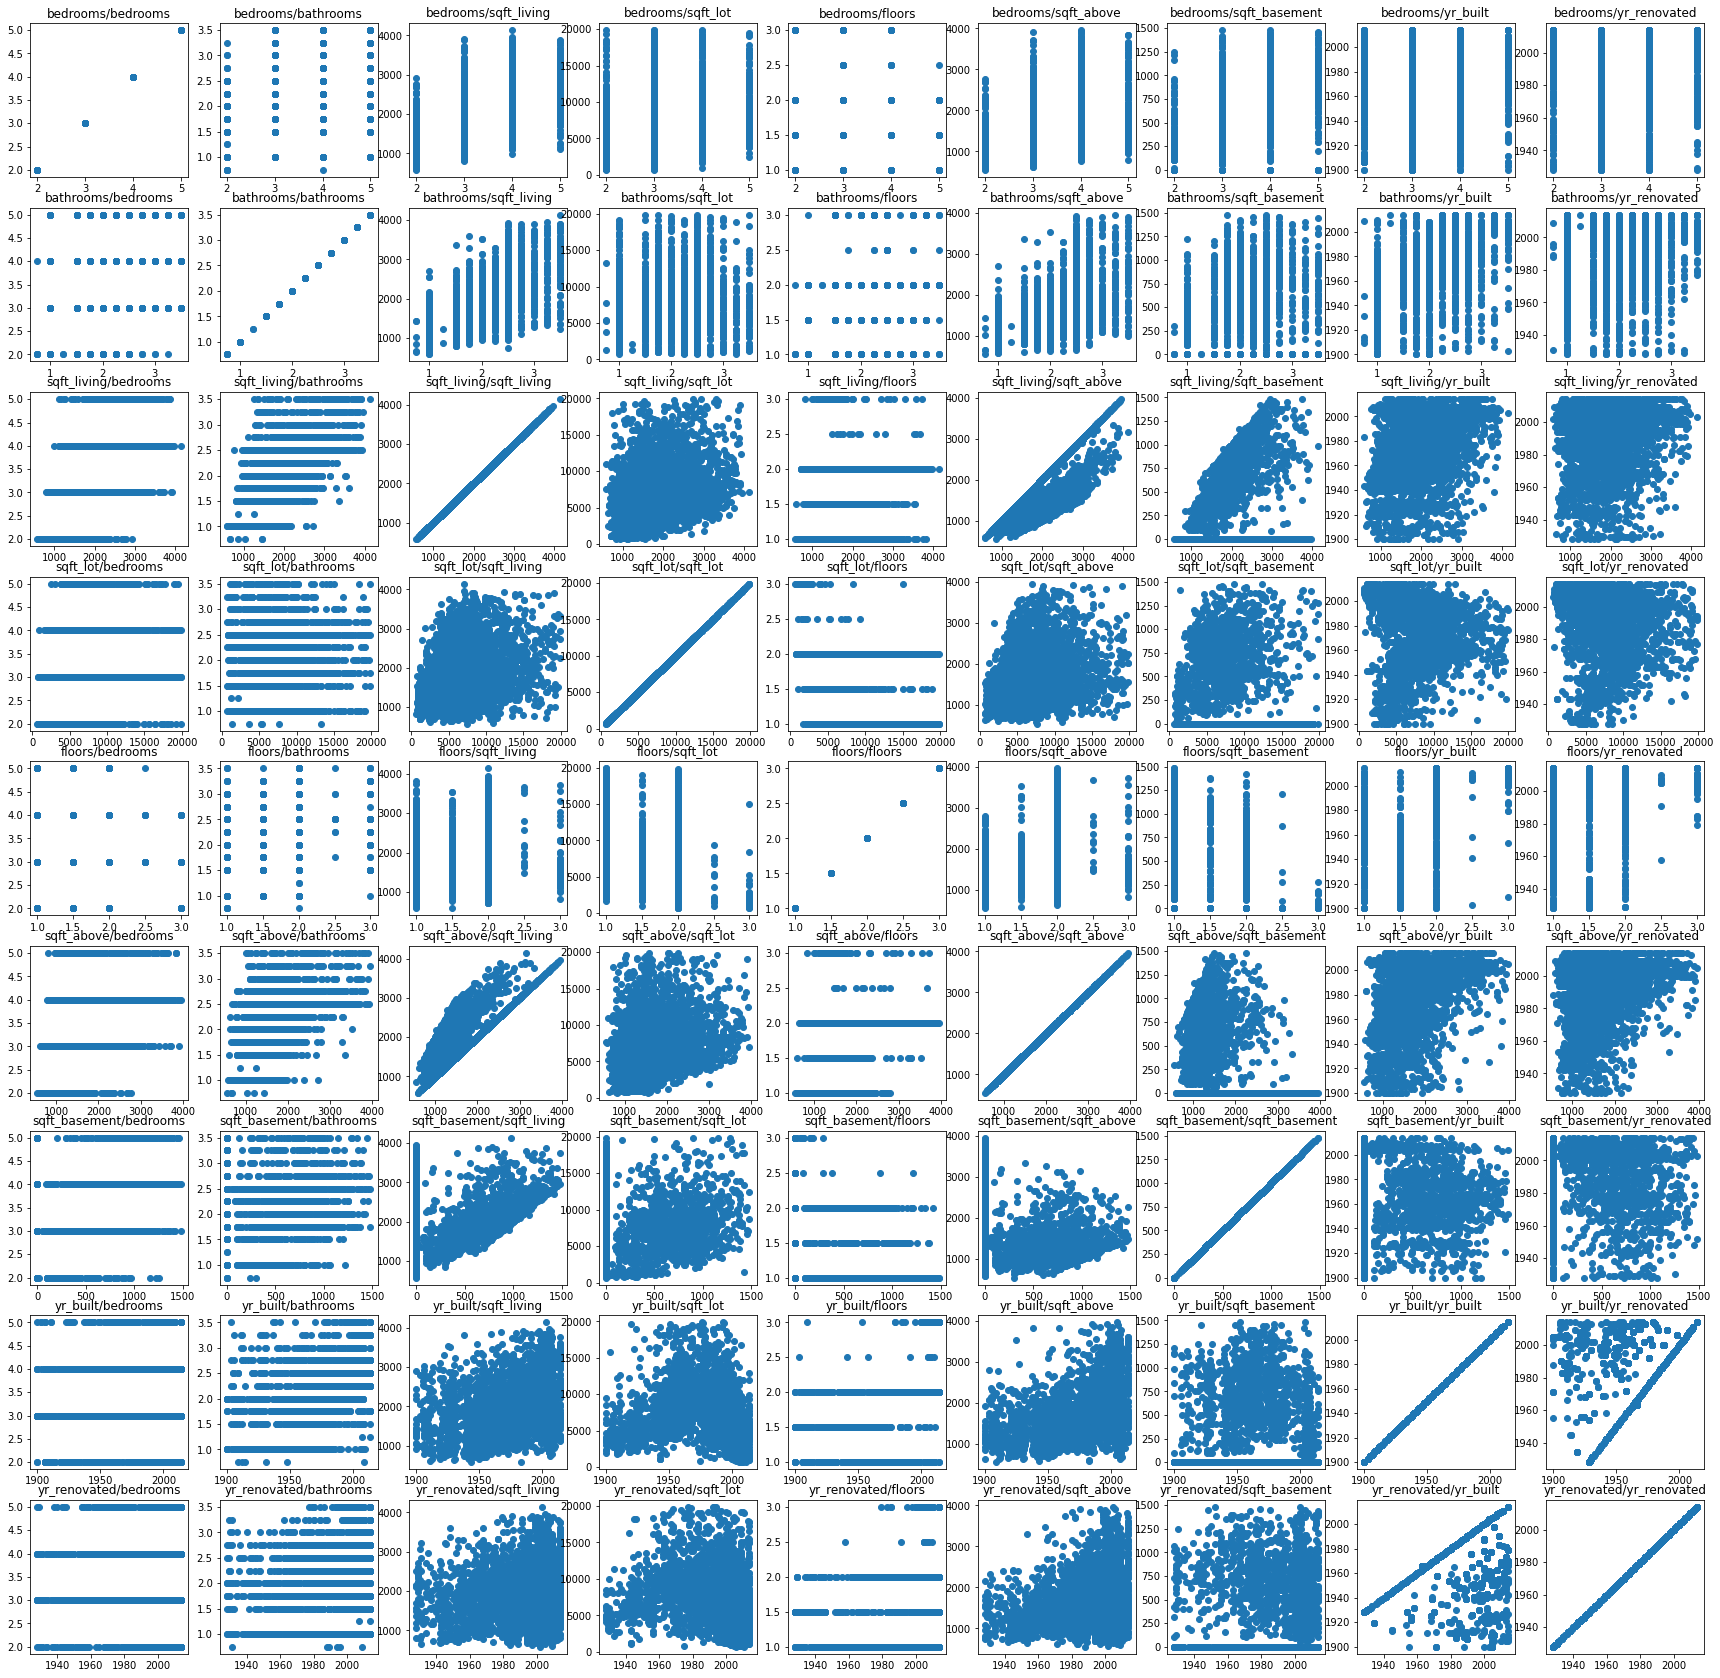

In [91]:
def scatter_plot_desplay_Xs(data,except_columns_start:int):
    X = data.iloc[:,:except_columns_start].iloc[:,1:]
    num_var = len(X.columns)
    
    fig, axs = plt.subplots(num_var,num_var,figsize=(30,30))

    for i in range(num_var):
        for j in range(num_var):
            axs[i,j].scatter(X.iloc[:,i], X.iloc[:,j])
            axs[i,j].set_title(str(X.columns[i])+'/'+ str(X.columns[j]))

    plt.show()
    
scatter_plot_desplay_Xs(dt_outlier_ers, 10)

<AxesSubplot:>

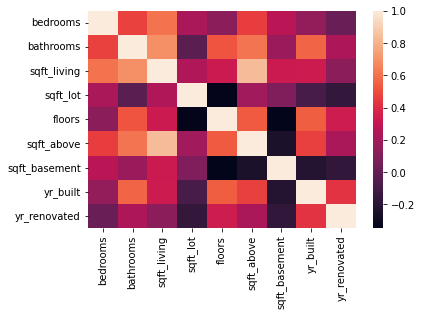

In [92]:
corr = dt_outlier_ers.iloc[:,:10].iloc[:,1:].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

# Train

In [93]:
def adj_rsq(rsq, p, n):
    sse_sst = 1-rsq
    return 1 - sse_sst*(n-1)/(n-p+1)

In [94]:
def residual_plot(y_test, y_pred):
    residuals = y_test - y_pred
    plt.figure(figsize=(30,10))
    sns.residplot(x=y_pred, y=residuals)
    plt.title("Residual Plot")
    plt.show()    

In [95]:
#performance evaluation function
def perf_eval_reg(y_true: Union[np.array, list], y_pred: Union[np.array,list])->list:
    """
    input:
    y_true : ndarray of shape (n_samples,)
    y_pred : ndarray of shape (n_samples,)

    Return:
    [rmse,mae,mape]: scores of regression in a list
    """
    rmse = round(MSE(y_true, y_pred, squared=False),5)
    mae = round(MAE(y_true, y_pred),5)
    mape = MAPE(y_true, y_pred)
    
    return {"RMSE":rmse, "MAE":mae, "MAPE":mape}


In [96]:
def split(dataset, test_size=0.3, Seed=1000, log = False):
    df_train, df_test = train_test_split(dataset, test_size=test_size, random_state=Seed)
    X_train = df_train.iloc[:,1:].to_numpy()
    X_test = df_test.iloc[:,1:].to_numpy()
    if log == True:
        y_train = np.log(df_train.iloc[:,0].to_numpy())
        y_test = np.log(df_test.iloc[:,0].to_numpy())
    else:
        y_train = df_train.iloc[:,0].to_numpy()
        y_test = df_test.iloc[:,0].to_numpy()
    return X_train, y_train, X_test, y_test

In [97]:
def train(X_train, y_train, X_test, y_test):
    mlr = LinearRegression()
    mlr.fit(X_train, y_train)
    adj = adj_rsq(mlr.score(X_train,y_train), len(X_train[0]), len(X_train))
    y_pred = mlr.predict(X_test)
    print("R-Squared >>", float(mlr.score(X_train,y_train)))
    print("Adjusted R-Squared >>", round(adj,5))
    print(perf_eval_reg(y_test, y_pred))
    residual_plot(y_test, y_pred)
    residuals = y_test - y_pred
    
    return mlr, residuals


In [98]:
def qqplot(resid):
    stats.probplot(resid,dist='norm', plot=pylab)
    print(np.mean(resid))
    pylab.show()
def histresid(resid):
    plt.hist(resid)
    plt.show()

## 1차시도

In [99]:
X_train, y_train, X_test, y_test = split(dt_outlier_ers)

R-Squared >> 0.7118768121526065
Adjusted R-Squared >> 0.70528
{'RMSE': 115313.17611, 'MAE': 80175.11051, 'MAPE': 0.21474807732427986}


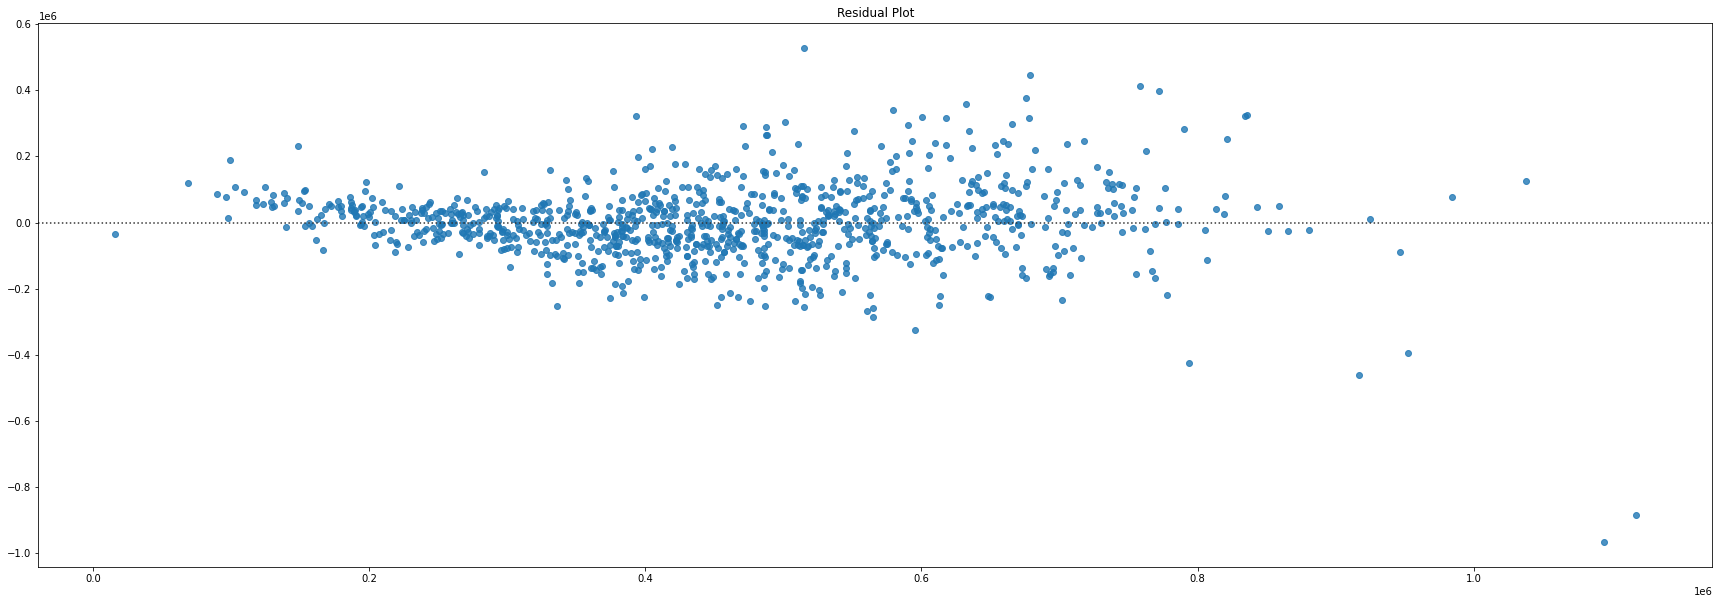

In [100]:
model, resid  = train(X_train,y_train,X_test,y_test)

-1673.3469276451356


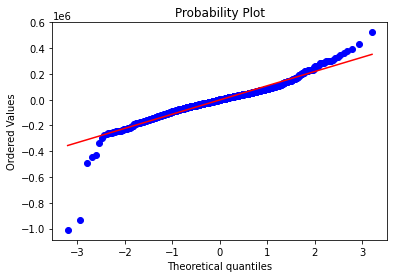

In [101]:
qqplot(resid)

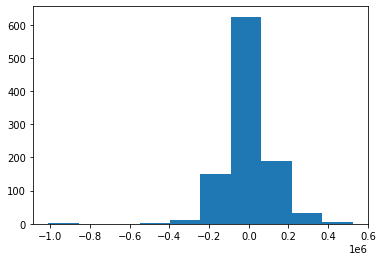

In [102]:
histresid(resid)

Outlier가 두개 존재하는 것으로 보아 이상치 제거를 추가로 진행해야함

이전에 진행한 방식 그대로 한번 더 filtering을 거친다.

In [103]:
dt_outlier_ers_2 = outlier_erase(dt_outlier_ers)

In [104]:
X_train, y_train, X_test, y_test = split(dt_outlier_ers_2)

R-Squared >> 0.7157549373696004
Adjusted R-Squared >> 0.70863
{'RMSE': 97857.60826, 'MAE': 70679.93241, 'MAPE': 0.18499680465038176}


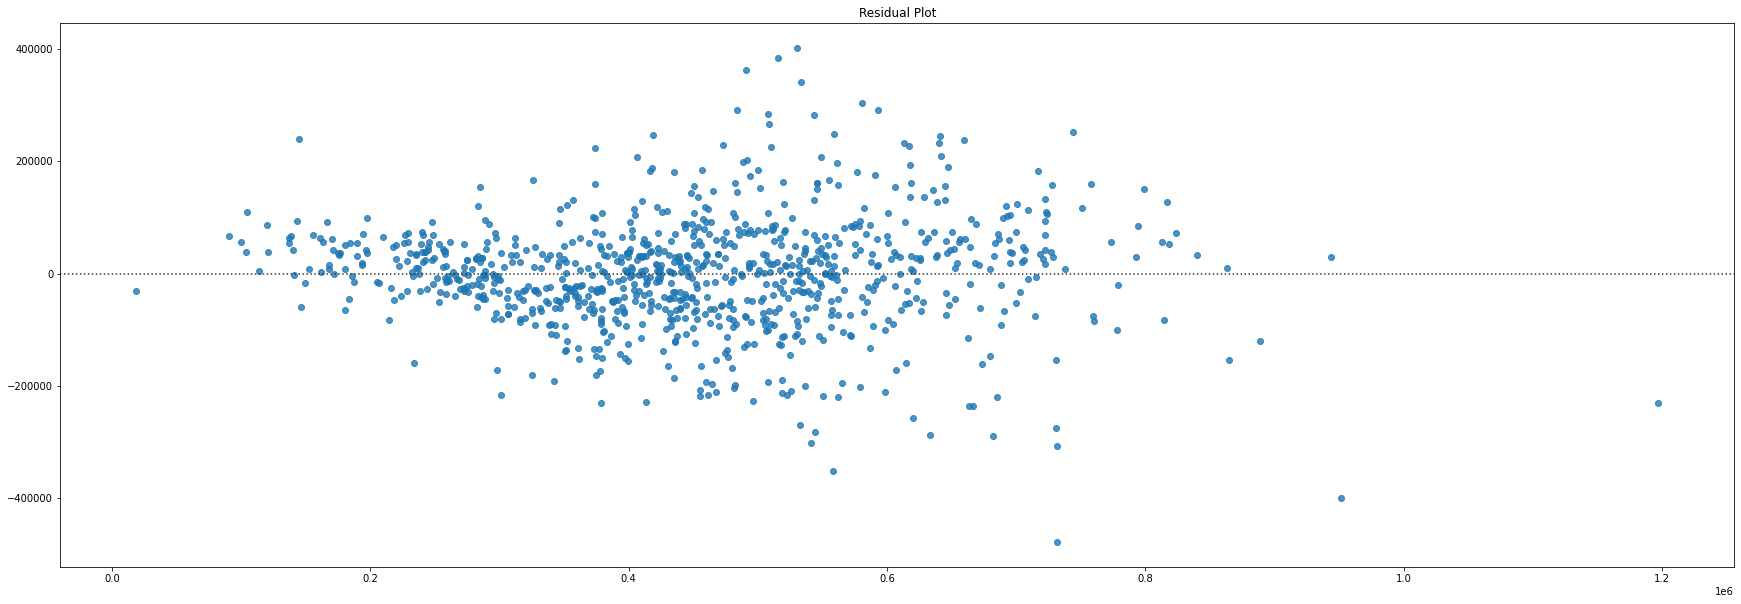

In [105]:
model, resid  = train(X_train,y_train,X_test,y_test)

-2035.628367629745


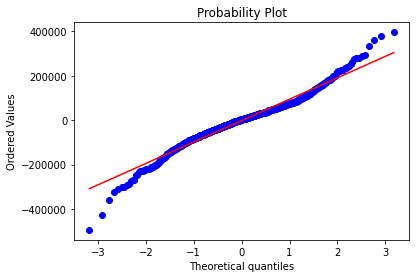

In [106]:
qqplot(resid)

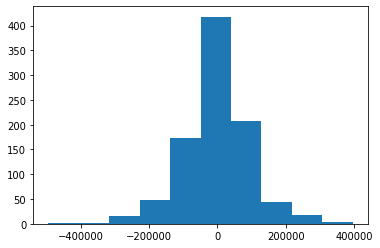

In [107]:
histresid(resid)

logscale 까지 진행해서 잔차도 등분산성 성립하도록

In [113]:
dt_outlier_ers_3 = outlier_erase(dt_outlier_ers_2)

In [114]:
Seed = 1000
test_size = 0.3
df_train, df_test = train_test_split(dt_outlier_ers_3, test_size=test_size, random_state=Seed)
X_train = df_train.iloc[:,1:].to_numpy()
y_train = np.log(df_train.iloc[:,0].to_numpy())


X_test = df_test.iloc[:,1:].to_numpy()
y_test = np.log(df_test.iloc[:,0].to_numpy())

In [115]:
def train(X_train, y_train, X_test, y_test):
    mlr = LinearRegression()
    mlr.fit(X_train, y_train)
    adj = adj_rsq(mlr.score(X_train,y_train), len(X_train[0]), len(X_train))
    y_pred = mlr.predict(X_test)
    print("R-Squared >>", float(mlr.score(X_train,y_train)))
    print("Adjusted R-Squared >>", round(adj,5))
    print(perf_eval_reg(y_test, y_pred))
    residual_plot(y_test, y_pred)
    residuals = y_test - y_pred
    
    return mlr, residuals


R-Squared >> 0.7096724862816475
Adjusted R-Squared >> 0.70217
{'RMSE': 0.23451, 'MAE': 0.1642, 'MAPE': 0.012815402649434288}


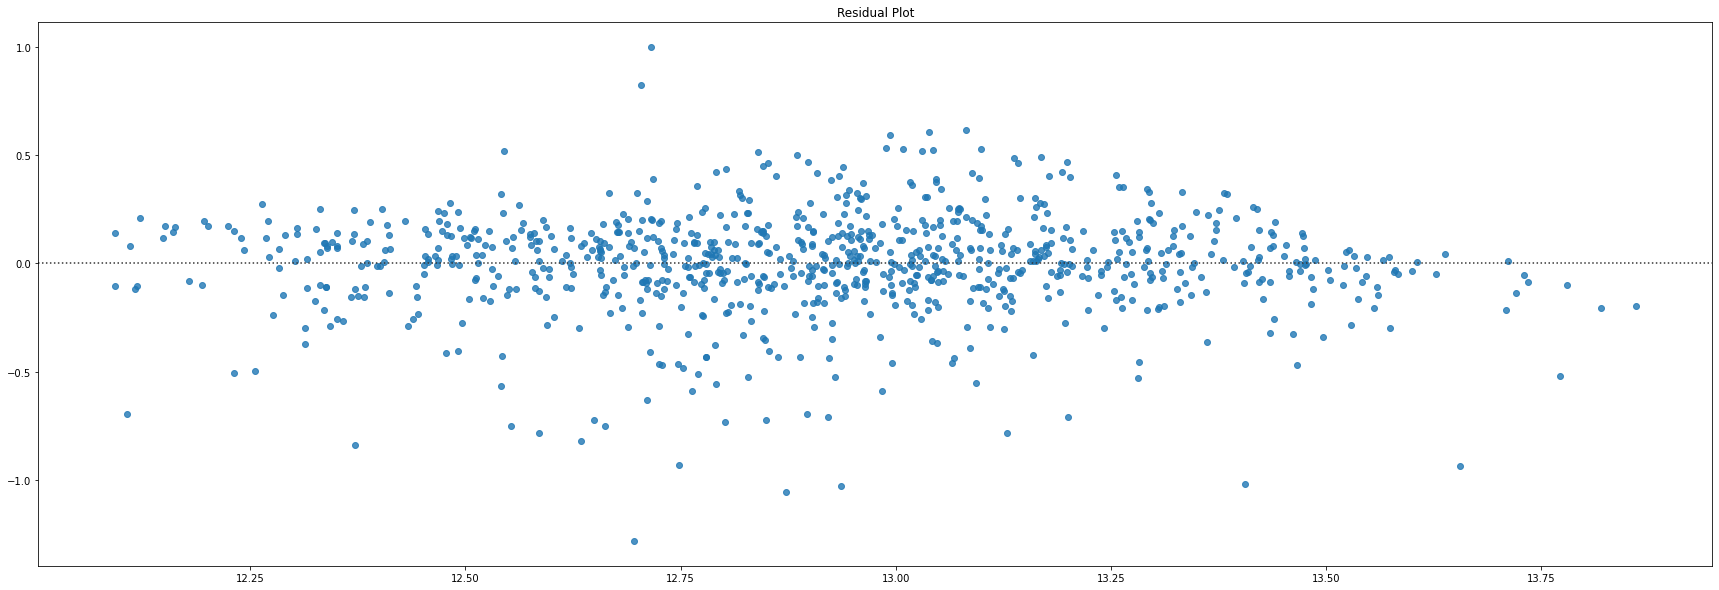

In [116]:
model, resid  = train(X_train,y_train,X_test,y_test)

0.0016543566736297714


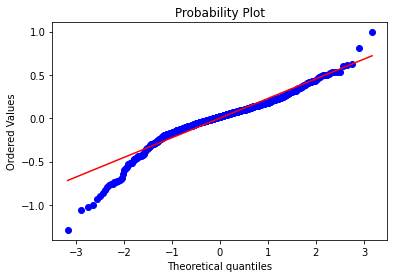

In [118]:
def qqplot(resid):
    stats.probplot(resid,dist='norm', plot=pylab)
    print(np.mean(resid))
    pylab.show()

qqplot(resid)

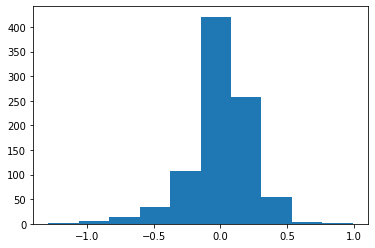

In [119]:
def histresid(resid):
    plt.hist(resid)
    plt.show()
    
histresid(resid)

In [120]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = X_train
y = y_train

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

est2.pvalues < 0.01

c:\Users\se99a\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
c:\Users\se99a\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     106.9
Date:                Fri, 07 Apr 2023   Prob (F-statistic):               0.00
Time:                        01:14:52   Log-Likelihood:                 188.58
No. Observations:                2104   AIC:                            -281.2
Df Residuals:                    2056   BIC:                            -9.891
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.1464      0.858     16.495      0.0

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False, False, False,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True, False, False, False,  True,
        True,  True, False,  True,  True, False,  True,  True, False,
        True,  True])

In [121]:
dt_outlier_ers_3.iloc[:,1:].columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'waterfront',
       'view', 'condition', 'city_Algona', 'city_Auburn',
       'city_Beaux Arts Village', 'city_Bellevue', 'city_Black Diamond',
       'city_Bothell', 'city_Burien', 'city_Carnation', 'city_Clyde Hill',
       'city_Covington', 'city_Des Moines', 'city_Duvall', 'city_Enumclaw',
       'city_Fall City', 'city_Federal Way', 'city_Inglewood-Finn Hill',
       'city_Issaquah', 'city_Kenmore', 'city_Kent', 'city_Kirkland',
       'city_Lake Forest Park', 'city_Maple Valley', 'city_Medina',
       'city_Mercer Island', 'city_Milton', 'city_Newcastle',
       'city_Normandy Park', 'city_North Bend', 'city_Pacific', 'city_Preston',
       'city_Ravensdale', 'city_Redmond', 'city_Renton', 'city_Sammamish',
       'city_SeaTac', 'city_Seattle', 'city_Shoreline', 'city_Skykomish',
       'city_Snoqualmie', 'city_Snoqualmie Pass', 'city_Tukwila',
 

변수 추가 제거 실시

In [133]:
shrinked_dt = dt_outlier_ers_3.drop(columns=['floors']) #'floors' 변수 제거

In [134]:
X_train, y_train, X_test, y_test = split(shrinked_dt, log = True)

R-Squared >> 0.7089145481698247
Adjusted R-Squared >> 0.70153
{'RMSE': 0.23446, 'MAE': 0.16424, 'MAPE': 0.012817026748490744}


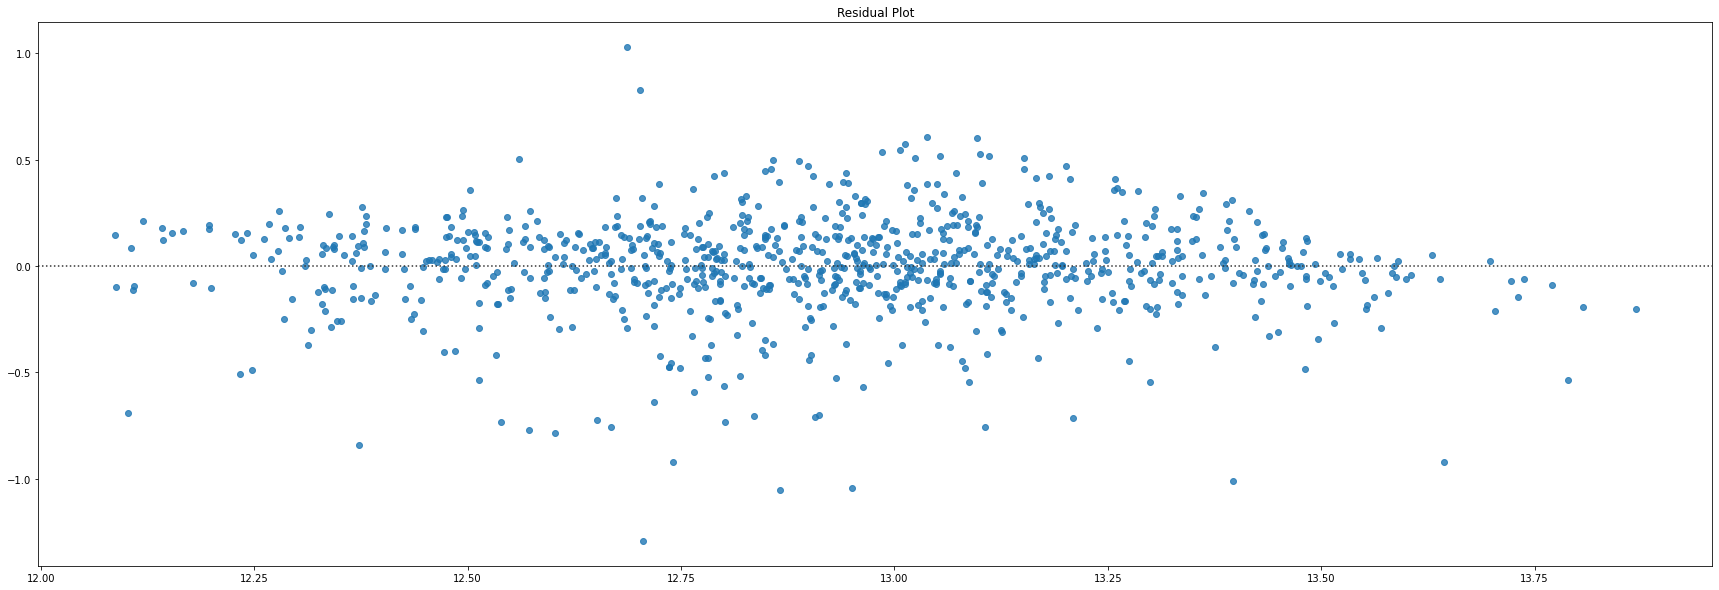

In [135]:
model, resid  = train(X_train,y_train,X_test,y_test)

0.0017513923679683381


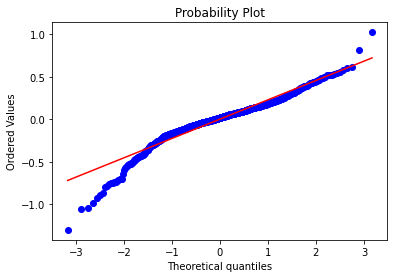

In [136]:
def qqplot(resid):
    stats.probplot(resid,dist='norm', plot=pylab)
    print(np.mean(resid))
    pylab.show()

qqplot(resid)

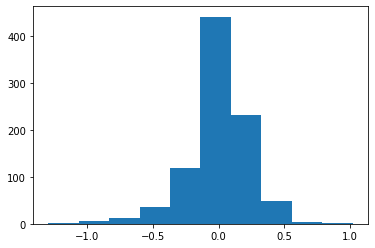

In [137]:
def histresid(resid):
    plt.hist(resid)
    plt.show()
    
histresid(resid)

In [138]:
X = X_train
y = y_train

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

est2.pvalues < 0.01

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     108.9
Date:                Fri, 07 Apr 2023   Prob (F-statistic):               0.00
Time:                        01:16:57   Log-Likelihood:                 185.84
No. Observations:                2104   AIC:                            -277.7
Df Residuals:                    2057   BIC:                            -12.06
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.8083      0.846     16.322      0.0

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True, False, False, False,  True, False,  True, False,
       False,  True,  True, False,  True,  True,  True, False,  True,
       False,  True,  True,  True, False,  True, False,  True,  True,
        True, False,  True,  True, False,  True,  True, False,  True,
        True])

In [139]:
shrinked_dt.iloc[:,1:].columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'waterfront', 'view',
       'condition', 'city_Algona', 'city_Auburn', 'city_Beaux Arts Village',
       'city_Bellevue', 'city_Black Diamond', 'city_Bothell', 'city_Burien',
       'city_Carnation', 'city_Clyde Hill', 'city_Covington',
       'city_Des Moines', 'city_Duvall', 'city_Enumclaw', 'city_Fall City',
       'city_Federal Way', 'city_Inglewood-Finn Hill', 'city_Issaquah',
       'city_Kenmore', 'city_Kent', 'city_Kirkland', 'city_Lake Forest Park',
       'city_Maple Valley', 'city_Medina', 'city_Mercer Island', 'city_Milton',
       'city_Newcastle', 'city_Normandy Park', 'city_North Bend',
       'city_Pacific', 'city_Preston', 'city_Ravensdale', 'city_Redmond',
       'city_Renton', 'city_Sammamish', 'city_SeaTac', 'city_Seattle',
       'city_Shoreline', 'city_Skykomish', 'city_Snoqualmie',
       'city_Snoqualmie Pass', 'city_Tukwila', 'city_Vasho

yr_renovated 추가 제거

In [140]:
shrinked_dt_2 = shrinked_dt.drop(columns=['yr_renovated']) #'renovated' 변수 제거

In [141]:
X_train, y_train, X_test, y_test = split(shrinked_dt_2, log = True)

R-Squared >> 0.7085149012190242
Adjusted R-Squared >> 0.70127
{'RMSE': 0.23519, 'MAE': 0.1649, 'MAPE': 0.012867315095838005}


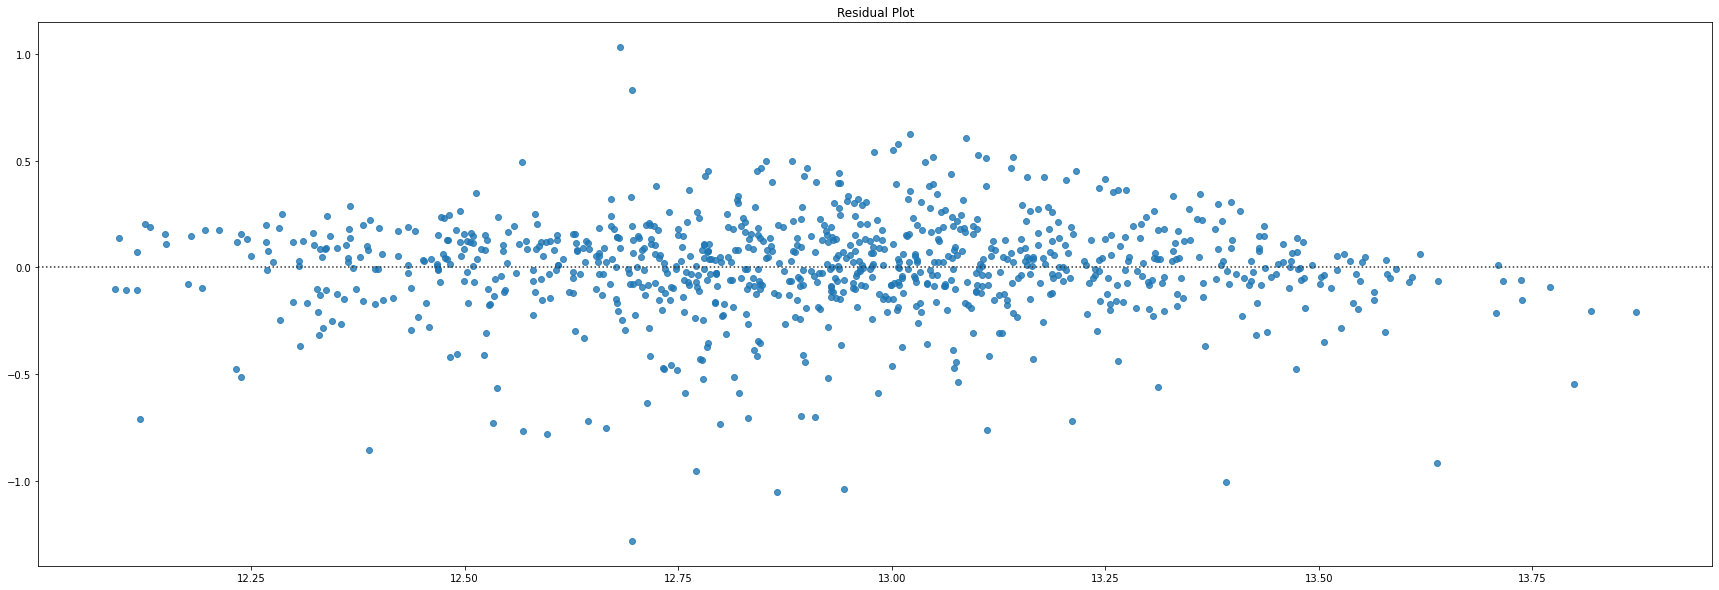

In [142]:
model, resid  = train(X_train,y_train,X_test,y_test)

0.0023461766647533697


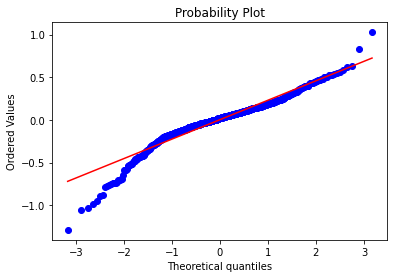

In [143]:
def qqplot(resid):
    stats.probplot(resid,dist='norm', plot=pylab)
    print(np.mean(resid))
    pylab.show()

qqplot(resid)

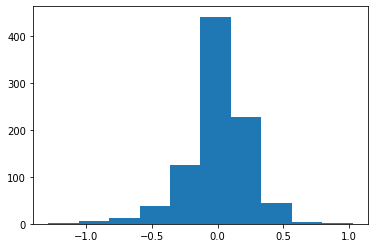

In [144]:
def histresid(resid):
    plt.hist(resid)
    plt.show()
    
histresid(resid)

In [145]:
X = X_train
y = y_train

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

est2.pvalues < 0.01

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     111.2
Date:                Fri, 07 Apr 2023   Prob (F-statistic):               0.00
Time:                        01:18:09   Log-Likelihood:                 184.40
No. Observations:                2104   AIC:                            -276.8
Df Residuals:                    2058   BIC:                            -16.82
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.9138      0.532     28.024      0.0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
        True, False, False, False,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True, False, False, False,  True,  True,  True,
       False,  True,  True, False,  True,  True, False,  True,  True])

In [146]:
shrinked_dt.iloc[:,1:].columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'waterfront', 'view',
       'condition', 'city_Algona', 'city_Auburn', 'city_Beaux Arts Village',
       'city_Bellevue', 'city_Black Diamond', 'city_Bothell', 'city_Burien',
       'city_Carnation', 'city_Clyde Hill', 'city_Covington',
       'city_Des Moines', 'city_Duvall', 'city_Enumclaw', 'city_Fall City',
       'city_Federal Way', 'city_Inglewood-Finn Hill', 'city_Issaquah',
       'city_Kenmore', 'city_Kent', 'city_Kirkland', 'city_Lake Forest Park',
       'city_Maple Valley', 'city_Medina', 'city_Mercer Island', 'city_Milton',
       'city_Newcastle', 'city_Normandy Park', 'city_North Bend',
       'city_Pacific', 'city_Preston', 'city_Ravensdale', 'city_Redmond',
       'city_Renton', 'city_Sammamish', 'city_SeaTac', 'city_Seattle',
       'city_Shoreline', 'city_Skykomish', 'city_Snoqualmie',
       'city_Snoqualmie Pass', 'city_Tukwila', 'city_Vasho

변수 5개 추가 제거

In [161]:
shrinked_dt_3 = shrinked_dt_2.drop(columns=['bathrooms','sqft_lot','sqft_above','sqft_basement','yr_built']) # sqftliving 과 관련된 변수 제거

In [162]:
X_train, y_train, X_test, y_test = split(shrinked_dt_3, log = True)

R-Squared >> 0.6898274593899636
Adjusted R-Squared >> 0.68289
{'RMSE': 0.24276, 'MAE': 0.17171, 'MAPE': 0.013389399425489997}


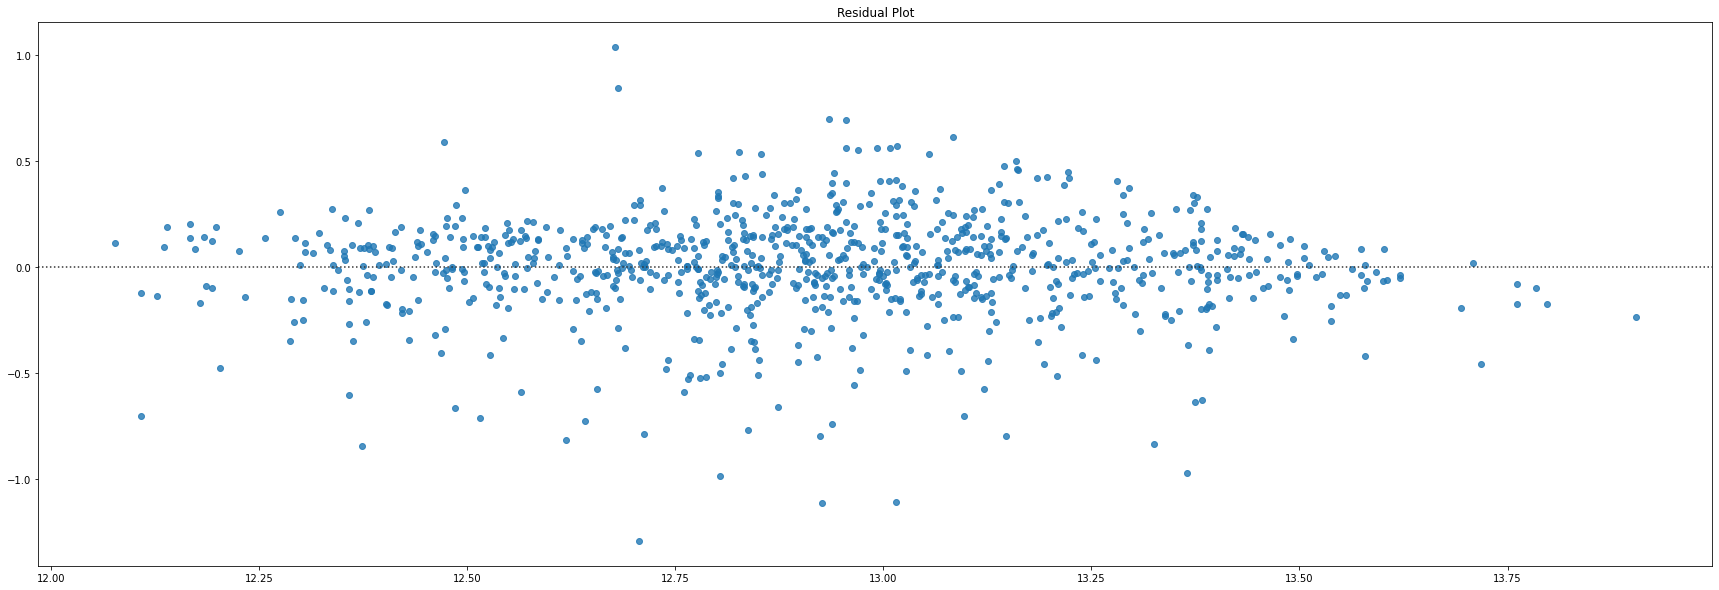

In [163]:
model, resid  = train(X_train,y_train,X_test,y_test)

0.002024563623108421


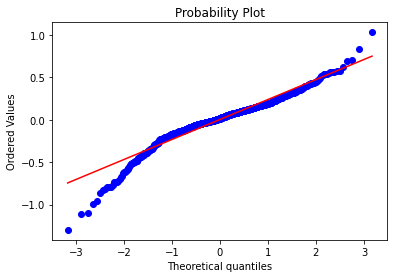

In [164]:
def qqplot(resid):
    stats.probplot(resid,dist='norm', plot=pylab)
    print(np.mean(resid))
    pylab.show()

qqplot(resid)

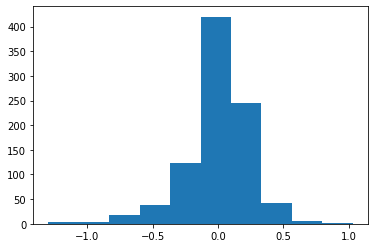

In [165]:
def histresid(resid):
    plt.hist(resid)
    plt.show()
    
histresid(resid)

In [166]:
X = X_train
y = y_train

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

est2.pvalues < 0.01

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     111.9
Date:                Fri, 07 Apr 2023   Prob (F-statistic):               0.00
Time:                        01:40:33   Log-Likelihood:                 119.03
No. Observations:                2104   AIC:                            -154.1
Df Residuals:                    2062   BIC:                             83.31
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.7657      0.041    289.701      0.0

array([ True,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True,  True, False, False, False, False,  True,
       False, False, False, False,  True,  True, False,  True,  True,
        True, False,  True, False,  True,  True,  True, False, False,
       False,  True,  True,  True, False,  True,  True, False,  True,
        True, False, False,  True])

In [167]:
shrinked_dt_3.iloc[:,1:].columns

Index(['bedrooms', 'sqft_living', 'waterfront', 'view', 'condition',
       'city_Algona', 'city_Auburn', 'city_Beaux Arts Village',
       'city_Bellevue', 'city_Black Diamond', 'city_Bothell', 'city_Burien',
       'city_Carnation', 'city_Clyde Hill', 'city_Covington',
       'city_Des Moines', 'city_Duvall', 'city_Enumclaw', 'city_Fall City',
       'city_Federal Way', 'city_Inglewood-Finn Hill', 'city_Issaquah',
       'city_Kenmore', 'city_Kent', 'city_Kirkland', 'city_Lake Forest Park',
       'city_Maple Valley', 'city_Medina', 'city_Mercer Island', 'city_Milton',
       'city_Newcastle', 'city_Normandy Park', 'city_North Bend',
       'city_Pacific', 'city_Preston', 'city_Ravensdale', 'city_Redmond',
       'city_Renton', 'city_Sammamish', 'city_SeaTac', 'city_Seattle',
       'city_Shoreline', 'city_Skykomish', 'city_Snoqualmie',
       'city_Snoqualmie Pass', 'city_Tukwila', 'city_Vashon',
       'city_Woodinville'],
      dtype='object')

# 두 모형 비교

원래 모형

In [249]:
dt_outlier_ers_3 = outlier_erase(dt_outlier_ers_2)

In [250]:
Seed = 1000
test_size = 0.3
df_train, df_test = train_test_split(dt_outlier_ers_3, test_size=test_size, random_state=Seed)
X_train = df_train.iloc[:,1:].to_numpy()
y_train = np.log(df_train.iloc[:,0].to_numpy())


X_test = df_test.iloc[:,1:].to_numpy()
y_test = np.log(df_test.iloc[:,0].to_numpy())

In [251]:
def train(X_train, y_train, X_test, y_test):
    mlr = LinearRegression()
    mlr.fit(X_train, y_train)
    adj = adj_rsq(mlr.score(X_train,y_train), len(X_train[0]), len(X_train))
    y_pred = mlr.predict(X_test)
    print("R-Squared >>", float(mlr.score(X_train,y_train)))
    print("Adjusted R-Squared >>", round(adj,5))
    print(perf_eval_reg(y_test, y_pred))
    residual_plot(y_test, y_pred)
    residuals = y_test - y_pred
    rmse, mae, mape = perf_eval_reg(y_test,y_pred).values()
    return mlr, residuals, round(mlr.score(X_train, y_train),5), adj, rmse, mae, mape


R-Squared >> 0.7096724862816475
Adjusted R-Squared >> 0.70217
{'RMSE': 0.23451, 'MAE': 0.1642, 'MAPE': 0.012815402649434288}


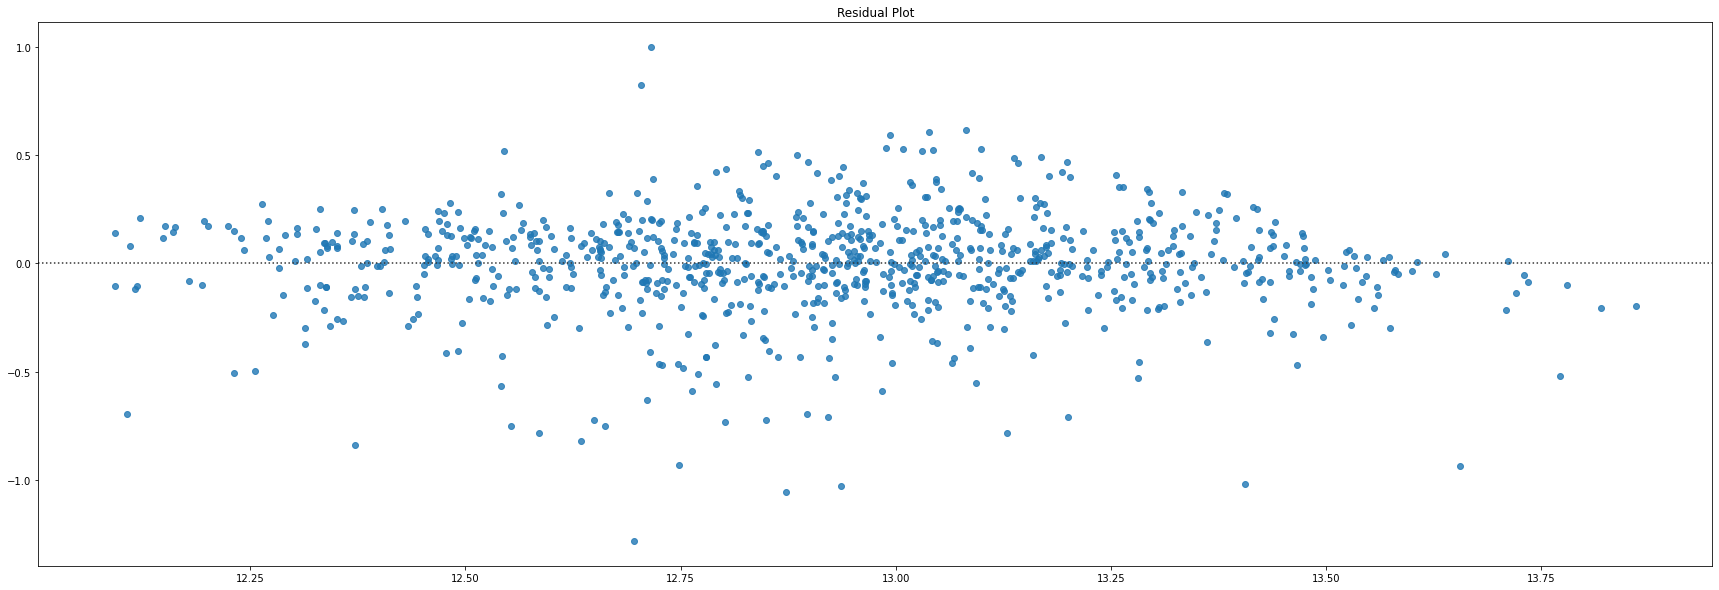

In [252]:
model_1, resid_1, r_sq_1, adj_r_sq_1, rmse_1, mae_1, mape_1  = train(X_train,y_train,X_test,y_test)

In [253]:
X = X_train
y = y_train

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

est2.pvalues < 0.01

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     106.9
Date:                Fri, 07 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:23:37   Log-Likelihood:                 188.58
No. Observations:                2104   AIC:                            -281.2
Df Residuals:                    2056   BIC:                            -9.891
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.1464      0.858     16.495      0.0

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False, False, False,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True, False, False, False,  True,
        True,  True, False,  True,  True, False,  True,  True, False,
        True,  True])

바뀐 모형

In [254]:
X_train, y_train, X_test, y_test = split(shrinked_dt_3, log = True)

R-Squared >> 0.6898274593899636
Adjusted R-Squared >> 0.68289
{'RMSE': 0.24276, 'MAE': 0.17171, 'MAPE': 0.013389399425489997}


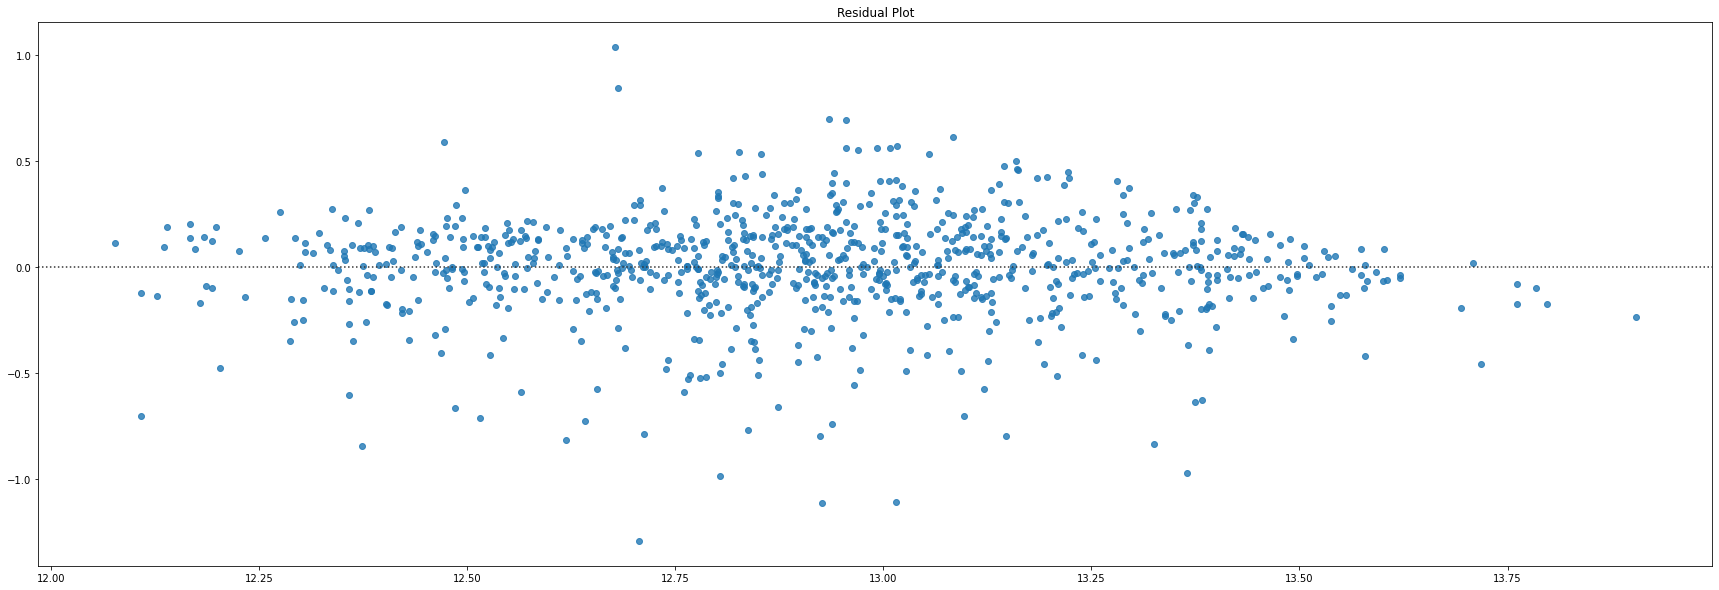

In [255]:
model_2, resid_2, r_sq_2, adj_r_sq_2, rmse_2, mae_2, mape_2 = train(X_train,y_train,X_test,y_test)

In [256]:
X = X_train
y = y_train

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

est2.pvalues < 0.01

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     111.9
Date:                Fri, 07 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:23:38   Log-Likelihood:                 119.03
No. Observations:                2104   AIC:                            -154.1
Df Residuals:                    2062   BIC:                             83.31
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.7657      0.041    289.701      0.0

array([ True,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True,  True, False, False, False, False,  True,
       False, False, False, False,  True,  True, False,  True,  True,
        True, False,  True, False,  True,  True,  True, False, False,
       False,  True,  True,  True, False,  True,  True, False,  True,
        True, False, False,  True])

결과 비교용 DataFrame 생성

In [257]:
original = [r_sq_1, adj_r_sq_1, rmse_1, mae_1, mape_1]
reduced = [r_sq_2, adj_r_sq_2, rmse_2, mae_2, mape_2]

#5단위로 모두 변환
for i in range(5):
    original[i] = round(float(original[i]),5)
    reduced[i] = round(float(reduced[i]), 5)
    
pd.DataFrame({'original_model':original, 'reduced_model':reduced}, index = ['R-squared','Adj. R-squared','RMSE','MAE','MAPE']).T

,R-squared,Adj. R-squared,RMSE,MAE,MAPE
original_model,0.70967,0.70217,0.23451,0.16420,0.01282
reduced_model,0.68983,0.68289,0.24276,0.17171,0.01339


## 추가적인 분석

### VIF

In [258]:
Seed = 1000
test_size = 0.3
df_train, df_test = train_test_split(dt_outlier_ers_3, test_size=test_size, random_state=Seed)
X_train = df_train.iloc[:,1:]

In [259]:
def vif(X_train):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['Feature'] = X_train.columns
    return vif

vif = vif(X_train)
vif

c:\Users\se99a\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
c:\Users\se99a\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF_Factor,Feature
0,1.702865e+00,bedrooms
1,3.086242e+00,bathrooms
2,inf,sqft_living
3,2.112768e+00,sqft_lot
4,2.927640e+00,floors
5,inf,sqft_above
6,inf,sqft_basement
7,2.564984e+00,yr_built
8,1.786390e+00,yr_renovated
9,NaN,waterfront


VIF 높은 Column 3개중에 2개만 Drop

In [260]:
vif_dataset = dt_outlier_ers_3.drop(columns=['sqft_above','sqft_basement'],axis=1)
Seed = 1000
test_size = 0.3
df_train, df_test = train_test_split(vif_dataset, test_size=test_size, random_state=Seed)
X_train = df_train.iloc[:,1:]

In [261]:
def vif(X_train):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['Feature'] = X_train.columns
    return vif

vif = vif(X_train)
vif

c:\Users\se99a\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF_Factor,Feature
0,1.686692,bedrooms
1,3.005426,bathrooms
2,2.761078,sqft_living
3,2.073470,sqft_lot
4,2.152251,floors
5,2.564127,yr_built
6,1.785827,yr_renovated
7,NaN,waterfront
8,1.088124,view
9,1.825471,condition


In [262]:
X_train, y_train, X_test, y_test = split(vif_dataset, log = True)

R-Squared >> 0.7061824651403985
Adjusted R-Squared >> 0.69888
{'RMSE': 0.23659, 'MAE': 0.16697, 'MAPE': 0.013027955993296392}


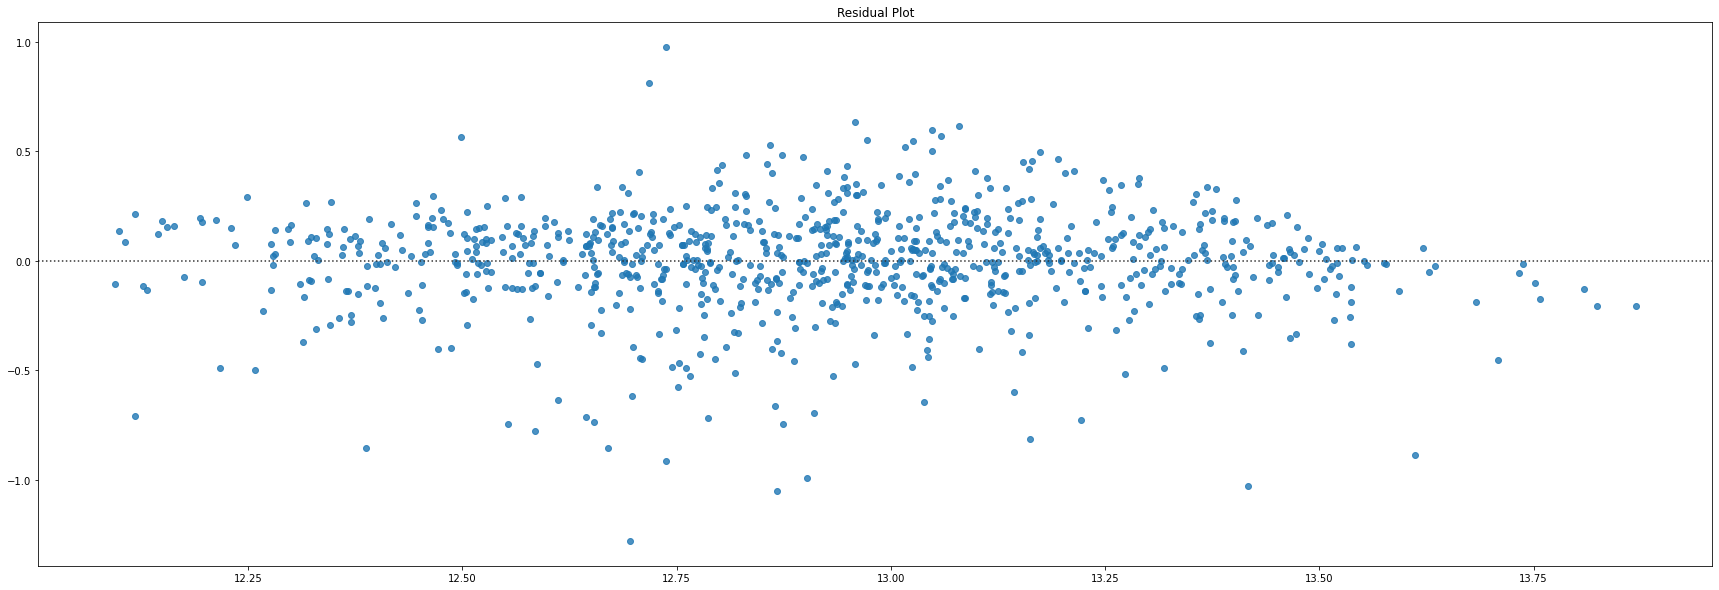

In [263]:
model_3, resid_3, r_sq_3, adj_r_sq_3, rmse_3, mae_3, mape_3 = train(X_train,y_train,X_test,y_test)

0.0008525955116810004


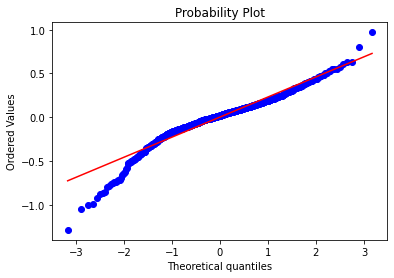

In [268]:
qqplot(resid_3)

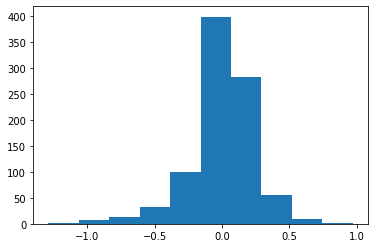

In [270]:
histresid(resid_3)

In [264]:
X = X_train
y = y_train

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

est2.pvalues < 0.01

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     107.5
Date:                Fri, 07 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:23:41   Log-Likelihood:                 176.01
No. Observations:                2104   AIC:                            -258.0
Df Residuals:                    2057   BIC:                             7.598
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.1450      0.863     16.399      0.0

array([ True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True, False, False, False,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True, False, False, False,  True,  True,  True,
       False,  True,  True, False,  True,  True, False,  True,  True])

3개 모델 비교 
- original : 로그변환까지 진행
- reduced : 로그 변환 이후, Scatterplot, corrplot, p-value 바탕으로 7개 변수 제거
- vif_reduced : 로그 변환 이후 VIF 스코어 확인 후, 다중공선성 제거 위해 2개 변수만 제거 

In [266]:
original = [r_sq_1, adj_r_sq_1, rmse_1, mae_1, mape_1]
reduced = [r_sq_2, adj_r_sq_2, rmse_2, mae_2, mape_2]
reduced_vif = [r_sq_3, adj_r_sq_3, rmse_3, mae_3, mape_3]

#5단위로 모두 변환
for i in range(5):
    original[i] = round(float(original[i]), 5)
    reduced[i] = round(float(reduced[i]), 5)
    reduced_vif[i] = round(float(reduced_vif[i]), 5)

pd.DataFrame({'original_model':original, 'reduced_model':reduced, 'vif_reduced_model':reduced_vif}, index = ['R-squared','Adj. R-squared','RMSE','MAE','MAPE']).T

,R-squared,Adj. R-squared,RMSE,MAE,MAPE
original_model,0.70967,0.70217,0.23451,0.16420,0.01282
reduced_model,0.68983,0.68289,0.24276,0.17171,0.01339
vif_reduced_model,0.70618,0.69888,0.23659,0.16697,0.01303


vif_reduced_model이 가장 적합해보인다.